# Using KNN Algorithm to predict if a person will have diabetes or not

### importing libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### loading the dataset

In [8]:
data = pd.read_csv('diabetes.csv')

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column

In [10]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


### extracting independent variables

In [11]:
X = data.iloc[:,0:8]

### extracting dependent variable

In [12]:
y = data.iloc[:,8]

### Explorning data to know relation before processing

<Axes: >

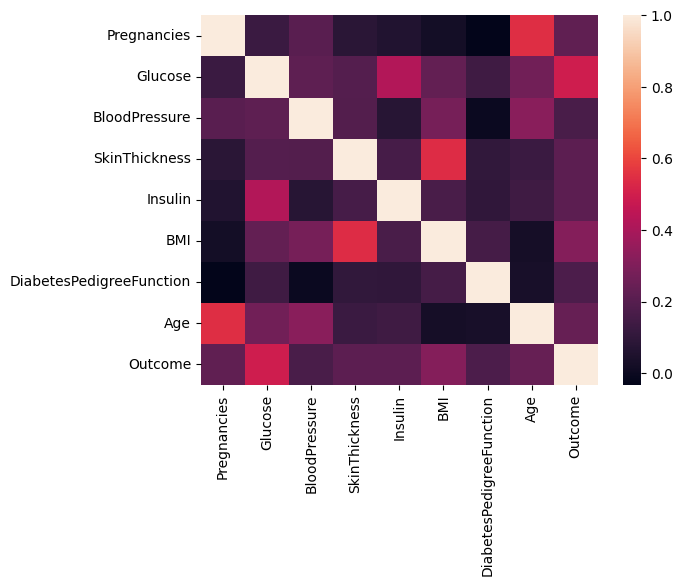

In [13]:
sns.heatmap(data.corr())

<Axes: xlabel='Age', ylabel='count'>

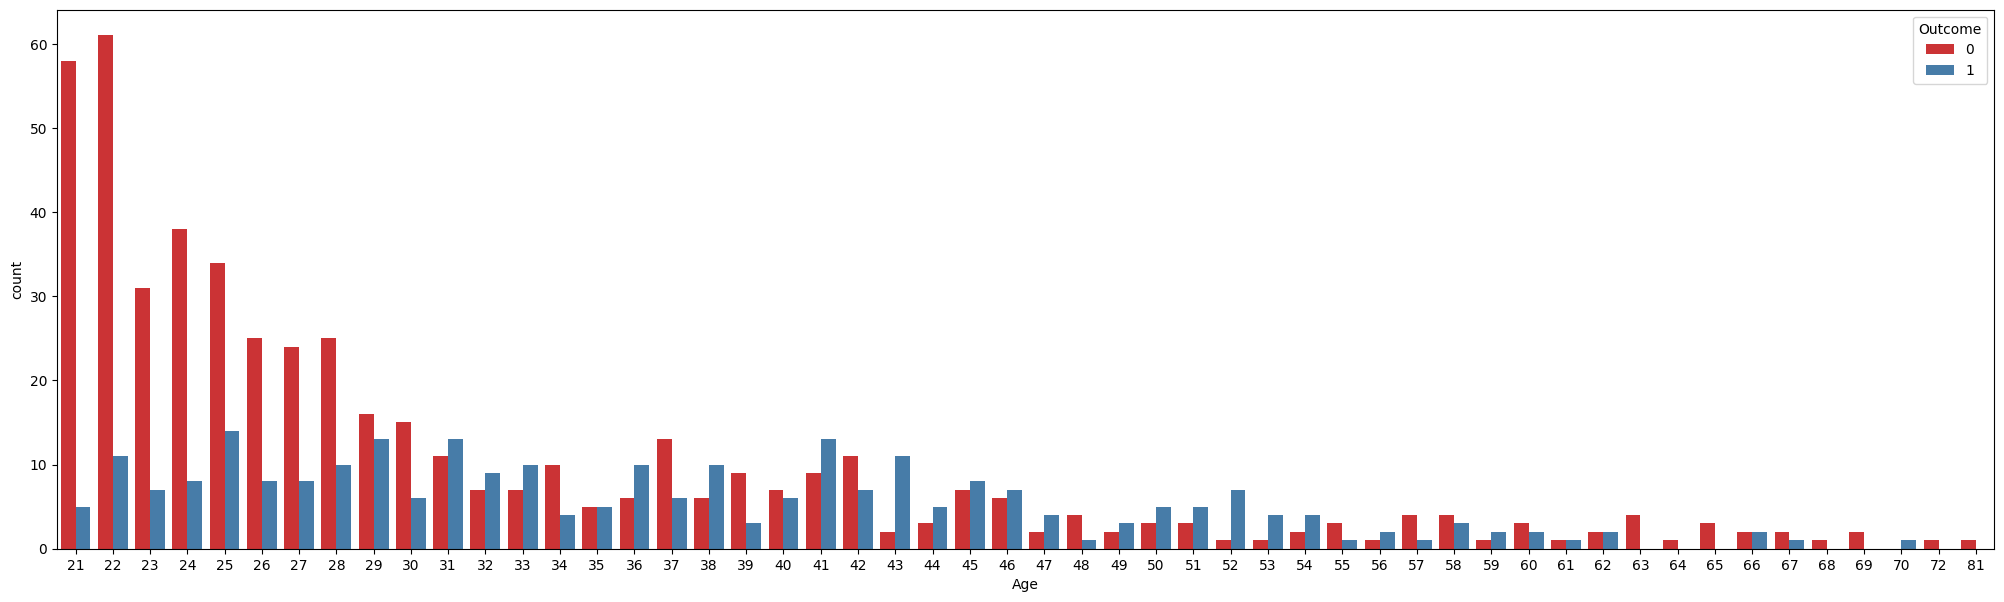

In [14]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=data,palette='Set1')

<Axes: xlabel='Glucose', ylabel='Count'>

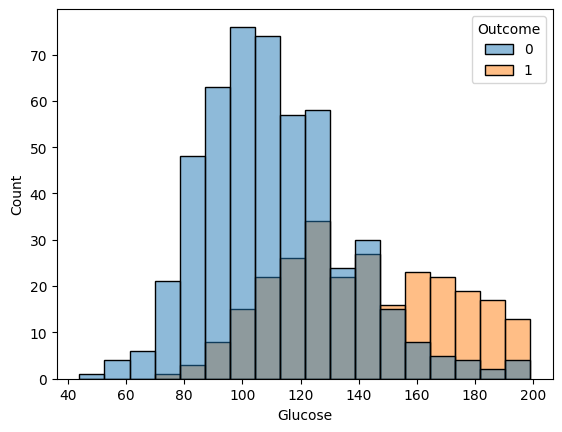

In [15]:
sns.histplot(x='Glucose',hue='Outcome',data=data)

<Axes: xlabel='Outcome', ylabel='Glucose'>

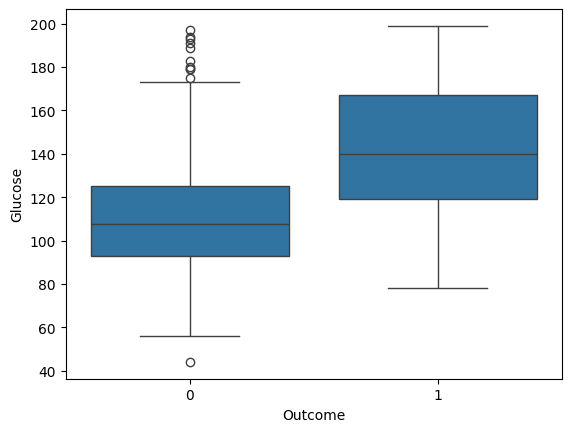

In [16]:
sns.boxplot(data=data,x='Outcome',y='Glucose')

### splitting dataset into training and testing set
### 20% used for testing

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


 ### feature scaling

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

[[-0.8354355   2.55686374  0.28101426 ...  1.47037408  2.78594417
  -0.96569189]
 [-0.54480808 -0.4856059   0.11438678 ...  0.13970383 -0.1876381
  -0.88240283]
 [ 0.03644676 -1.51078589 -0.8853781  ...  0.19693696 -0.22668514
  -0.71582471]
 ...
 [ 0.03644676  0.67185537  1.11415166 ...  1.62776519  0.53623395
  -0.96569189]
 [-0.25418066 -0.187973    0.11438678 ... -0.90480077 -1.07971278
  -0.79911377]
 [-0.8354355  -0.4856059  -0.0522407  ... -0.26092807  1.06487079
  -0.79911377]]


### loading model - KNN

In [19]:
classifier = KNeighborsClassifier(n_neighbors=11,metric='euclidean')

### fitting model

In [20]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

### making predictions

In [21]:
y_pred = classifier.predict(X_test)

### evaluating model

In [22]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))


[[94 13]
 [15 32]]
0.6956521739130435


### accuracy


In [23]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182


In [24]:
print(roc_auc_score(y_test,y_pred))

0.7796778683634918


#### Naive Bayes

In [28]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7857142857142857
[[92 15]
 [18 29]]


In [27]:
print(f1_score(y_test,y_pred))

0.6373626373626373
